<a href="https://colab.research.google.com/github/Lohith1701/Customer-Churn-Analysis/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import pandas as pd

In [289]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [290]:
data1=data

In [291]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [292]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [293]:
data = data.dropna(subset=['TotalCharges'])

In [294]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-294-4107023359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
data.to_csv("Cleaned_Telco_Churn_Data.csv", index=False)

In [ ]:
data

In [295]:
data['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


In [296]:
data.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [ ]:
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 6, 12, 24, 48, 72],
                            labels=['0–6 mo','6–12 mo','1–2 yr','2–4 yr','4–6 yr'])
data.groupby('tenure_group')['Churn'].mean()

In [297]:
data.groupby(pd.cut(data['MonthlyCharges'], bins=5))['Churn'].mean()

/tmp/ipython-input-297-2559745334.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.cut(data['MonthlyCharges'], bins=5))['Churn'].mean()


,Churn
MonthlyCharges,
"(18.15, 38.35]",0.114461
"(38.35, 58.45]",0.270189
"(58.45, 78.55]",0.295238
"(78.55, 98.65]",0.369863
"(98.65, 118.75]",0.300573


In [298]:
data.groupby('InternetService')['Churn'].mean()

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

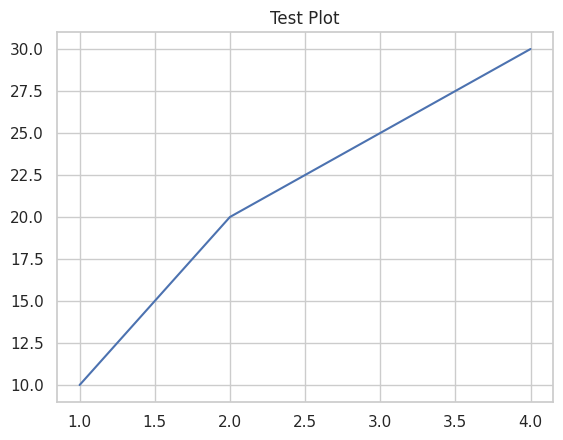

In [300]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Test Plot")
plt.show()

In [301]:
data = pd.read_csv("Cleaned_Telco_Churn_Data.csv")

In [302]:
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 6, 12, 24, 48, 72],
                            labels=['0–6 mo','6–12 mo','1–2 yr','2–4 yr','4–6 yr'])

In [303]:
if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [304]:
data['tenure_group'] = pd.cut(data['tenure'],
                            bins=[0, 6, 12, 24, 48, 72],
                            labels=['0–6 mo','6–12 mo','1–2 yr','2–4 yr','4–6 yr'],
                            right=True)

In [305]:
churn_counts = data['Churn'].value_counts()
axes[0, 0].pie(churn_counts,
               labels=['Not Churned', 'Churned'],
               autopct='%1.1f%%',
               colors=['#66b3ff', '#ff9999'],
               startangle=140)
axes[0, 0].set_title('Customer Churn Distribution')

Text(0.5, 1.0, 'Customer Churn Distribution')

In [306]:
contract_churn = data.groupby('Contract')['Churn'].mean()
sns.barplot(x=contract_churn.index, y=contract_churn.values, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Churn Rate by Contract Type')
axes[0, 1].set_ylabel('Churn Rate')
axes[0, 1].set_xlabel('Contract Type')

/tmp/ipython-input-306-1362342797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_churn.index, y=contract_churn.values, ax=axes[0, 1], palette='pastel')


Text(0.5, 496.25, 'Contract Type')

In [307]:
tenure_churn = data.groupby('tenure_group')['Churn'].mean()
sns.barplot(x=tenure_churn.index, y=tenure_churn.values, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Churn Rate by Tenure Group')
axes[1, 0].set_ylabel('Churn Rate')
axes[1, 0].set_xlabel('Tenure Group')

/tmp/ipython-input-307-586398290.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = data.groupby('tenure_group')['Churn'].mean()
/tmp/ipython-input-307-586398290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_churn.index, y=tenure_churn.values, ax=axes[1, 0], palette='Set2')


Text(0.5, 76.24999999999999, 'Tenure Group')

In [308]:
corr = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Heatmap')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

In [309]:
churn_counts = data['Churn'].value_counts()
axes[0, 0].pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
axes[0, 0].set_title('Customer Churn Distribution')

Text(0.5, 1.0, 'Customer Churn Distribution')

In [310]:
contract_churn = data.groupby('Contract')['Churn'].mean()
sns.barplot(x=contract_churn.index, y=contract_churn.values, ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Contract Type')
axes[0, 1].set_ylabel('Churn Rate')

Text(714.1931818181816, 0.5, 'Churn Rate')

In [311]:
tenure_churn = data.groupby('tenure_group')['Churn'].mean()
sns.barplot(x=tenure_churn.index, y=tenure_churn.values, ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Tenure Group')
axes[1, 0].set_ylabel('Churn Rate')

/tmp/ipython-input-311-1732451476.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = data.groupby('tenure_group')['Churn'].mean()


Text(132.0, 0.5, 'Churn Rate')

In [312]:
corr = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation with Churn')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [313]:
print(data.columns)
print(data.head())
print(data['Churn'].value_counts())

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL         

In [314]:
print(data['tenure'].describe())
print(data['tenure_group'].value_counts(dropna=False))

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
tenure_group
4–6 yr     2239
2–4 yr     1594
0–6 mo     1470
1–2 yr     1024
6–12 mo     705
Name: count, dtype: int64


In [315]:
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0–1 yr','1–2 yr','2–3 yr','3–4 yr','4–5 yr','5–6 yr'])

In [316]:
print(data.shape)
print(data.columns)

(7032, 22)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')


In [317]:
print(data['Churn'].unique())

[0 1]


In [318]:
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64


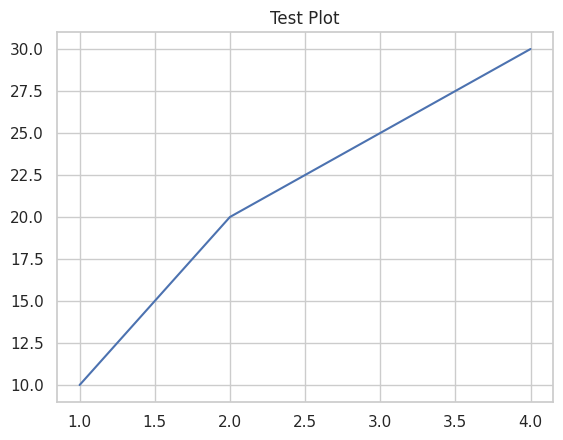

In [319]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Test Plot")
plt.show()

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [322]:
data['tenure_group'] = pd.cut(data['tenure'],
                              bins=[0, 6, 12, 24, 48, 72],
                              labels=['0–6 mo','6–12 mo','1–2 yr','2–4 yr','4–6 yr'])

In [323]:
sns.set(style="whitegrid")

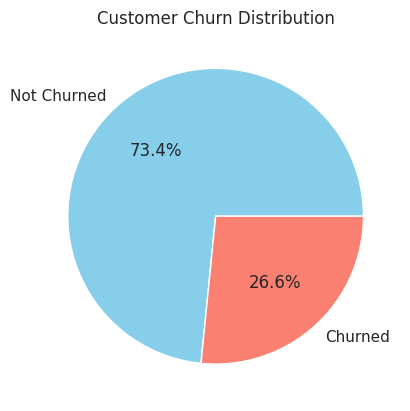

In [325]:
data['Churn'].value_counts().plot(kind='pie',
                                  autopct='%1.1f%%',
                                  labels=['Not Churned', 'Churned'],
                                  colors=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.ylabel('')
plt.show()

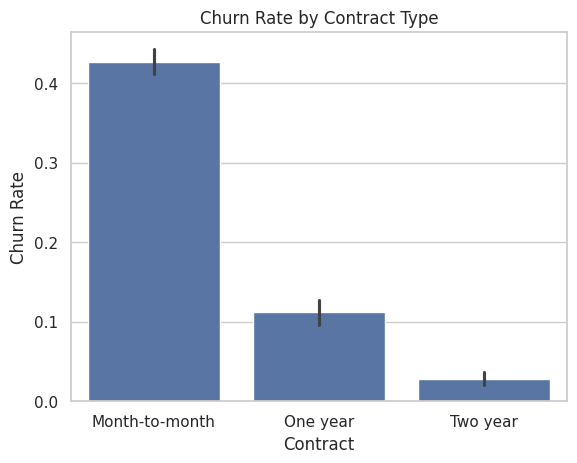

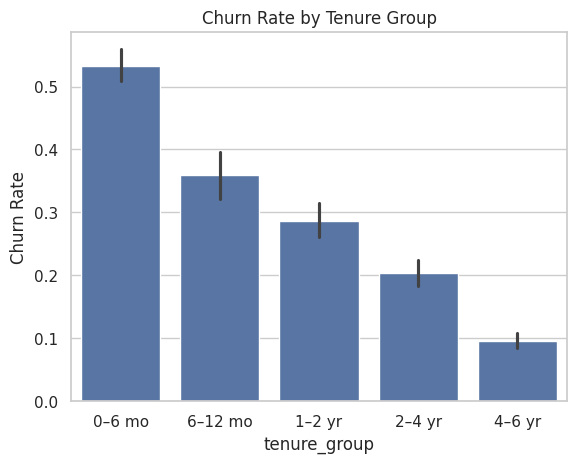

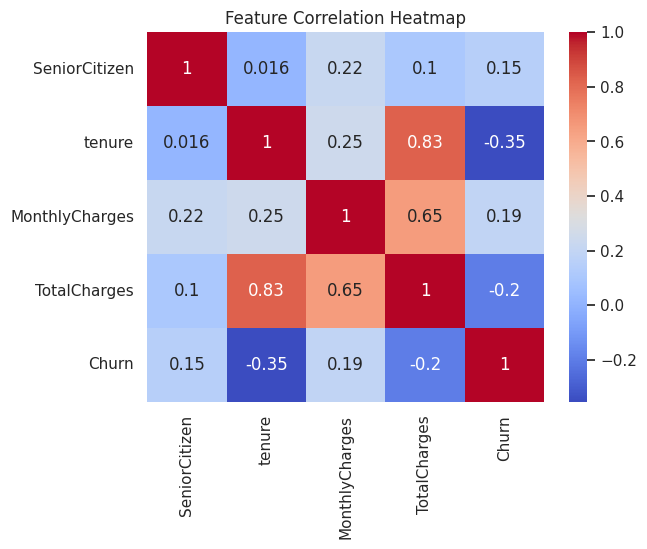

In [328]:
sns.barplot(x='Contract', y='Churn', data=data)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

sns.barplot(x='tenure_group', y='Churn', data=data)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.show()

corr = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [329]:
!pip install -q pandas scikit-learn seaborn matplotlib

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [330]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Telco_Churn_Data.csv to Cleaned_Telco_Churn_Data (2).csv


In [334]:
data = pd.read_csv("Cleaned_Telco_Churn_Data.csv")

if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

if 'customerID' in data.columns:
    data = data.drop(['customerID'], axis=1)

data = pd.get_dummies(data, drop_first=True)

In [335]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [336]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("🔍 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔍 Logistic Regression Results
Accuracy: 0.795260663507109
[[1377  172]
 [ 260  301]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.54      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [337]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("🌲 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🌲 Random Forest Results
Accuracy: 0.785781990521327
[[1385  164]
 [ 288  273]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



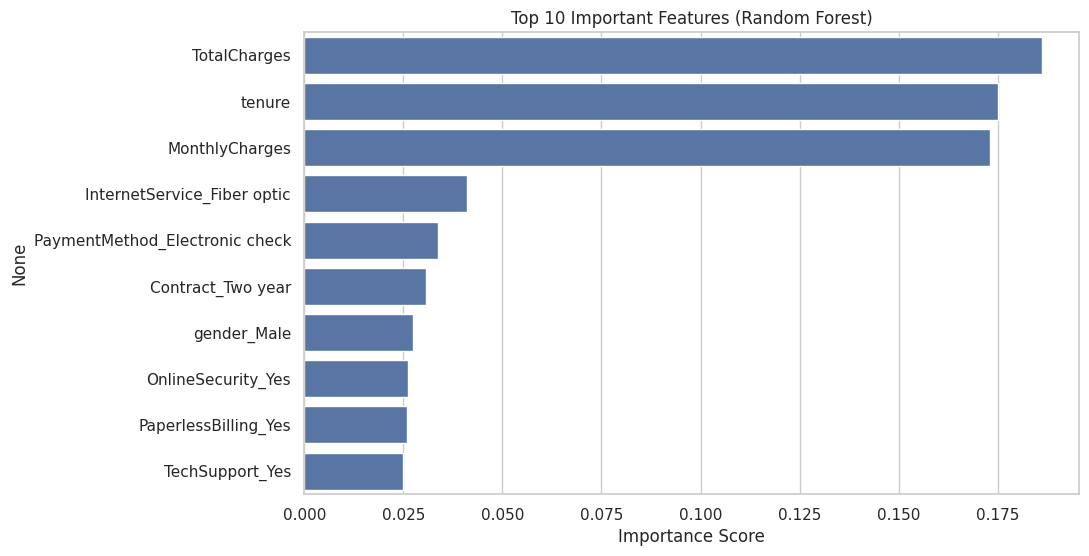

In [338]:
importances = rf_model.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features[:10], y=features.index[:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

done
